In [1]:
import cv2
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def video_to_image(video_file):
    video = cv2.VideoCapture(video_file) #read video file
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT)) # count the no. of frame in a video
    frame_rate = video.get(cv2.CAP_PROP_FPS)  # get the frame rate of the video
    
    extract_frame = int(frame_rate * 5)

    for i in range(0, total_frames, extract_frame):
        video.set(cv2.CAP_PROP_POS_FRAMES, i) # 0-based index of the frame to be decoded/captured next.
        success, frame = video.read() 
        if success:
            cv2.imwrite("frame_{}.jpg".format(i), frame)
    video.release()

In [3]:
def extract_mfcc_features(video_file):
    y, sr = librosa.core.load(video_file) # Load an audio file as a floating point time series.
    audio_length = librosa.get_duration(y=y, sr=sr) # compute the duration (in seconds) of an audio time series
    intervals = int(np.ceil(audio_length / 5)) #Return the ceiling of the input, element-wise. eg a = [-1.3, -1.2, -1] returns [-1, -1, -1]
    interval_start = 0
    mfccs = []
    for i in range(intervals):
        interval_end = min(interval_start + 5 * sr, len(y))
        interval = y[interval_start:interval_end]
        mfccs.append(librosa.feature.mfcc(y=interval, sr=sr, dct_type=3)) # mfccs feature extraction
        interval_start = interval_end
    return mfccs, sr

In [4]:
mfccs,sr = extract_mfcc_features("video.mp4")

d:\CodeRush\Groupwork1\venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


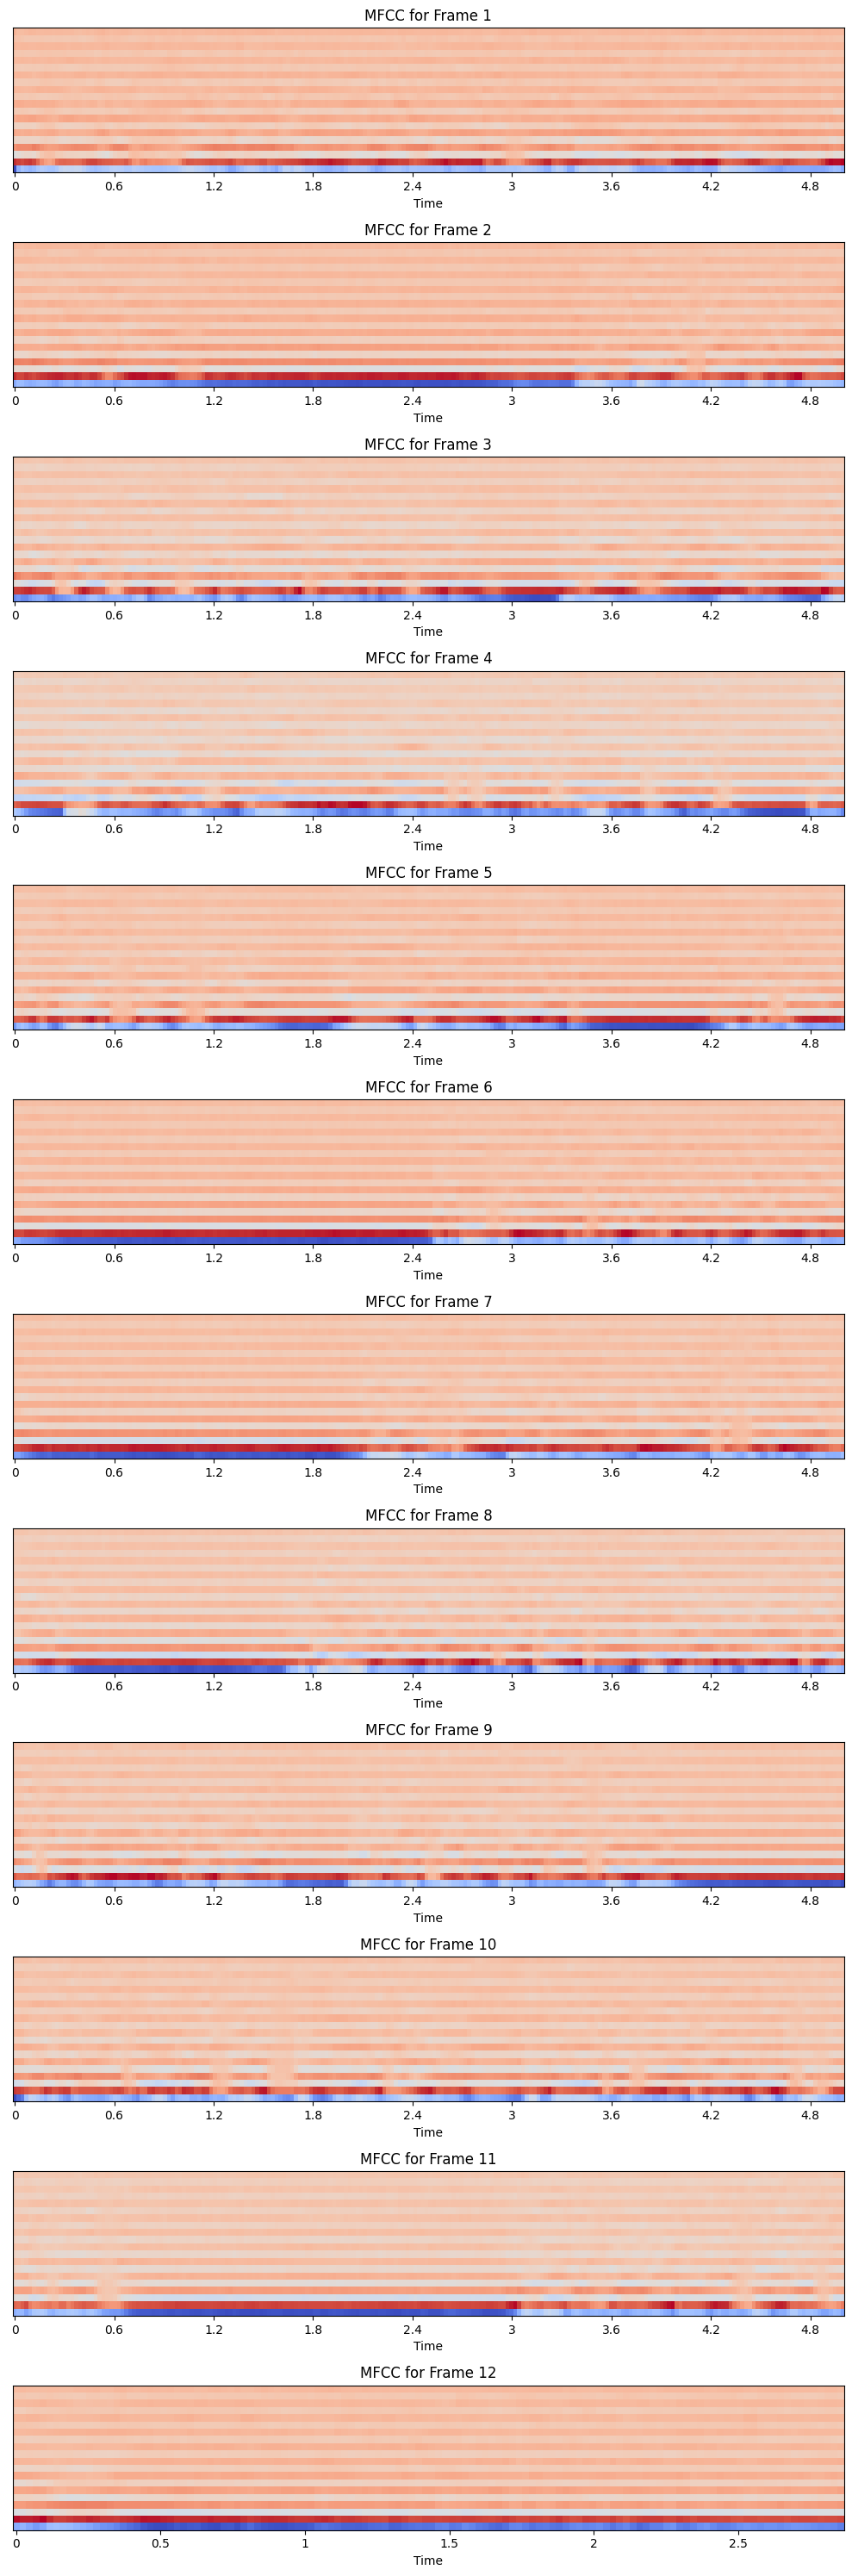

In [5]:
plt.figure(figsize=(10, 30))
for i, mfcc in enumerate(mfccs):
    plt.subplot(len(mfccs), 1, i+1) #ploting multiple plot in one figure
    librosa.display.specshow(mfcc, sr=sr, x_axis='time') # displays the feature spectrum
    plt.title(f"MFCC for Frame {i+1}") 
plt.tight_layout() # manage padding across subplots
plt.show()